Dataset shape: (45211, 17)
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married        NaN      no     1506     yes   no   
4   33           NaN   single        NaN      no        1      no   no   

  contact  day_of_week month  duration  campaign  pdays  previous poutcome   y  
0     NaN            5   may       261         1     -1         0      NaN  no  
1     NaN            5   may       151         1     -1         0      NaN  no  
2     NaN            5   may        76         1     -1         0      NaN  no  
3     NaN            5   may        92         1     -1         0      NaN  no  
4     NaN            5   may       198         1     -1         0      NaN  no  
Accuracy: 0.8970474400088466

Classificati

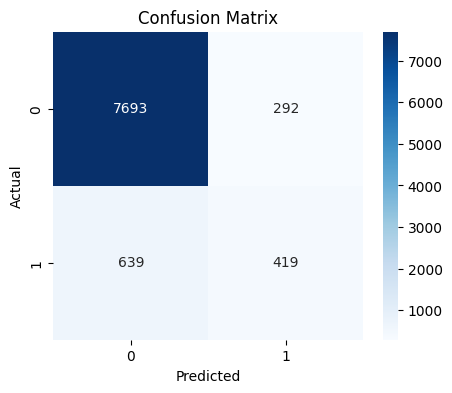

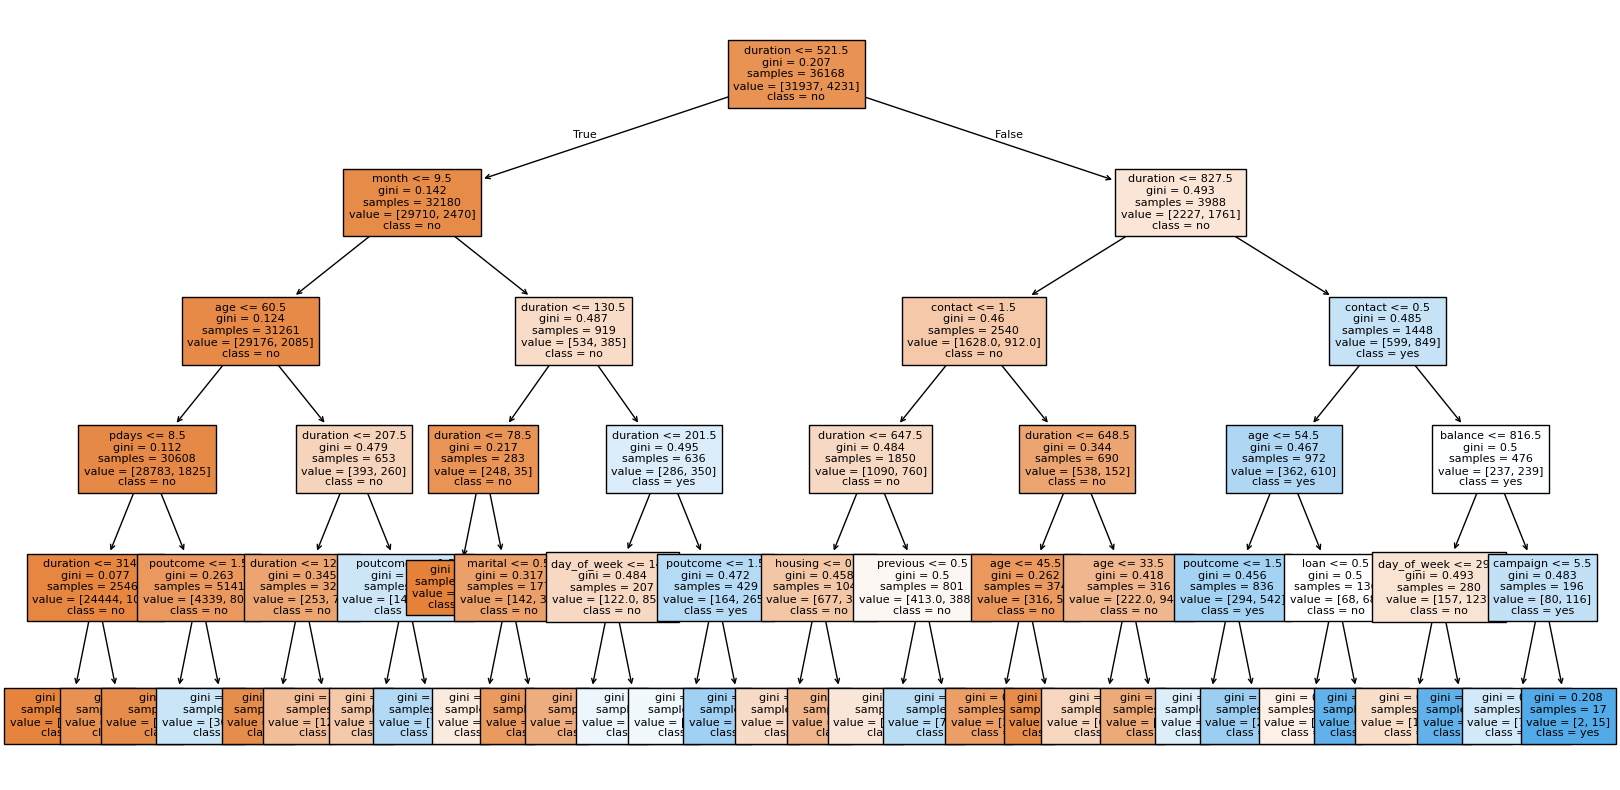

In [5]:
# ----- Install required library -----
!pip install ucimlrepo

# ----- Imports -----
from ucimlrepo import fetch_ucirepo
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# ----- Load Dataset -----
# Fetch Bank Marketing dataset (UCI repo, ID = 222)
bank_marketing = fetch_ucirepo(id=222)

# Extract features and target
X = bank_marketing.data.features
y = bank_marketing.data.targets

# Convert y to a proper Series with column name 'y'
y = y.iloc[:, 0]
y.name = "y"

# Combine into one DataFrame
df = pd.concat([X, y], axis=1)

print("Dataset shape:", df.shape)
print(df.head())

# ----- Data Preprocessing -----
# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

for col in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Separate features and target again
X = df_encoded.drop("y", axis=1)
y = df_encoded["y"]

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Train Decision Tree -----
clf = DecisionTreeClassifier(random_state=42, max_depth=5)
clf.fit(X_train, y_train)

# ----- Predictions -----
y_pred = clf.predict(X_test)

# ----- Evaluation -----
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ----- Visualize Decision Tree -----
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=X.columns, class_names=["no", "yes"], filled=True, fontsize=8)
plt.show()
